# CUSTOMER CHURN CLASSIFICATION PROJECT


## BUSINESS UNDERSTANDING

### Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.¶

### For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.


# PROJECT EXPECTATION

### In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

## Our analysis or methods comprises the following steps:¶

### 1) Hypothesis formation and Data Processing - Importing the relevant libraries and modules, Cleaning of Data, Check data types, Encoding Data labels etc.

### 2)Data Evaluation -- Perform bivariate and multivariate analysis, EDA

### 3)Build & Select Model -- Train Model on dataset and select the best performing model.

### 4)Evaluate your chosen Model.

### 5)Model Improvement.

### 6)Future Predictions.

### 7)Key Insights and Conclusion.


# HYPOTHESIS STATEMENT

### H0: CHURN RATE IS NOT DEPENDENT ON THE GENDER¶

### H1: CHURN RATE IS DEPENDENT ON THE GENDER


# ANALYTICAL QUESTIONS

### 1) What is the total annual charges

### 2) What is the total charges of males and females respectively.¶

### 3) Which services has the highest churn rate

### 4) Which Services has the highest charge

### 5) Which Gender churn the most.

## IMPORTING LIBRARIES

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
import pickle

from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm # sklearn modules for data preprocessing:from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #sklearn modules for Model Selection:from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score #Standard 
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import RandomOverSampler
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# loading all the Datasets

# Train Datasets
data1 = pd.read_csv(r'SQL_DATASET.csv')

data2 = pd.read_csv(r'LP2_Telco-churn-last-2000.csv')

# Test Dataset
data3 = pd.read_excel(r'Telco-churn-second-2000.xlsx')

In [3]:
data1

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2209-XADXF,Female,False,False,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [4]:
# delecting the Unamed column

del data1['Unnamed: 0']

In [5]:
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [6]:
data2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7,Yes
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


# MERGING THE TRAIN DATASETS BY CONCATINATING DATA1 AND DATA2

In [8]:
# concatenating data1, data2 to get the train data

train_df = pd.concat([data1, data2], ignore_index=True)

In [9]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [10]:
# Test data

test_df = data3

test_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7,Yes
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


# EXPLORATORY DATA ANALYSIS (EDA)

In [11]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
train_df.shape

(5043, 21)

In [14]:
train_df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [15]:
train_df.describe()

,tenure,MonthlyCharges
count,5043.000000,5043.000000
mean,32.576641,65.090214
std,24.529807,30.068133
min,0.000000,18.400000
25%,9.000000,35.775000
50%,29.000000,70.550003
75%,56.000000,90.050003
max,72.000000,118.650002


In [16]:
train_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [18]:
test_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
test_df.shape

(2000, 21)

In [20]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes


In [21]:
test_df.shape

(2000, 21)

In [22]:
# Drpping the Churn Columnin the test dataset

test_df = test_df.drop(columns = 'Churn', axis=1)



In [23]:
test_df = test_df.drop(columns = 'customerID', axis=1)

In [24]:
test_df.shape

(2000, 19)

In [25]:
test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [26]:
test_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [27]:
# IN OUR TRAIN DATASET, LET CONVERT ALL THE TRUE TO YES AND FALSE TO NO.

train_df = train_df.replace({True:'Yes',False:'No','No Internet Service':'No','Yes':'Yes','No':'No','No phone service':'No'}, inplace = False)

# Converting 'TotalCharges' Column to Numeric

train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors = 'coerce')

train_df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,No,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [28]:
# lets split our dataset into numeric and categorical datas

num_col = train_df.select_dtypes(exclude='object')

cat_col = train_df.select_dtypes(include='object')


In [29]:
train_df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.240645,0.826264
MonthlyCharges,0.240645,1.000000,0.647007
TotalCharges,0.826264,0.647007,1.000000


<AxesSubplot:>

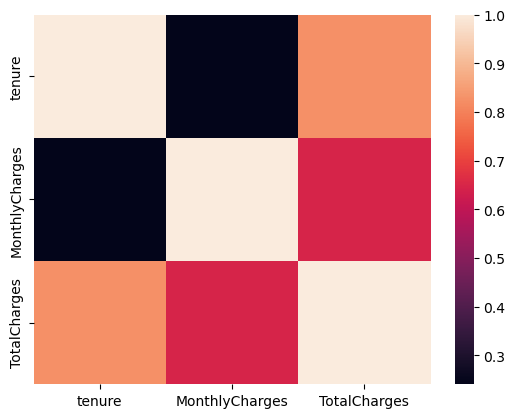

In [30]:
sns.heatmap(train_df.corr())

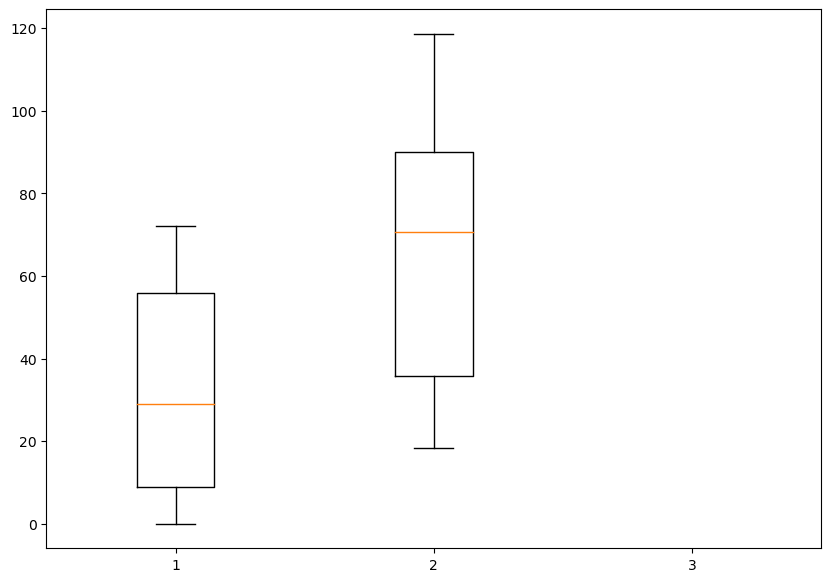

In [31]:
fig=plt.figure(figsize=(10,7))

plt.boxplot(num_col)

plt.show()



# UNIVARIATE ANALYSIS

### It is the simplest method of analyzing data where we examin each variable individually. 

### For Categorical features, we use frequency table or bar plots which will calculate the number of each category in a particular variable.

### For numerical features, probability density plots can be used to look at the distribution of the variable.




## Target Variable
#### We first look at the target variable which is the Churn Column. As it is a categorical variable. 

### let us look at its frequency table, percentage distribution and barplot.

In [32]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,No,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [33]:
# Frequency table of a variable will give us the count of category in that variable.

train_df['Churn'].value_counts()

No     3706
Yes    1336
Name: Churn, dtype: int64

In [34]:
# Sum of counts

train_df['Churn'].value_counts().sum()

5042

In [35]:
#Normalize can be set to True to print proportions instead of number

train_df['Churn'].value_counts(normalize = True)

No     0.735026
Yes    0.264974
Name: Churn, dtype: float64

<AxesSubplot:>

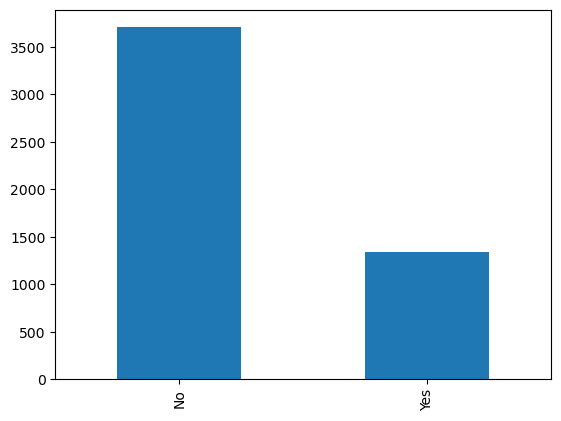

In [36]:
train_df['Churn'].value_counts().plot.bar()

In [37]:
train_df['Churn'].value_counts()

No     3706
Yes    1336
Name: Churn, dtype: int64

In [38]:
train_df['Churn'].value_counts(normalize = True)

No     0.735026
Yes    0.264974
Name: Churn, dtype: float64

<AxesSubplot:>

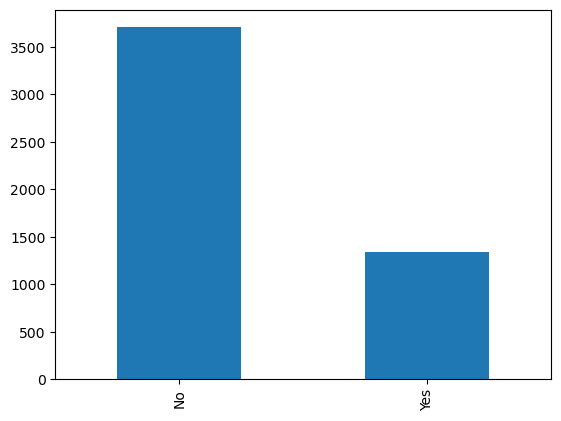

In [39]:
train_df['Churn'].value_counts().plot.bar()

From the graph, 

1) A total of 3706 which is about 74% of the total number 5,042 did not churn.

2) A total of 1,336 which is about 27% of the total number 5,042 churn (left).

### Now let Visualize some variables

In [40]:
train_df['gender'].value_counts()

Male      2559
Female    2484
Name: gender, dtype: int64

In [41]:
train_df['gender'].value_counts(normalize = True)

Male      0.507436
Female    0.492564
Name: gender, dtype: float64

<AxesSubplot:>

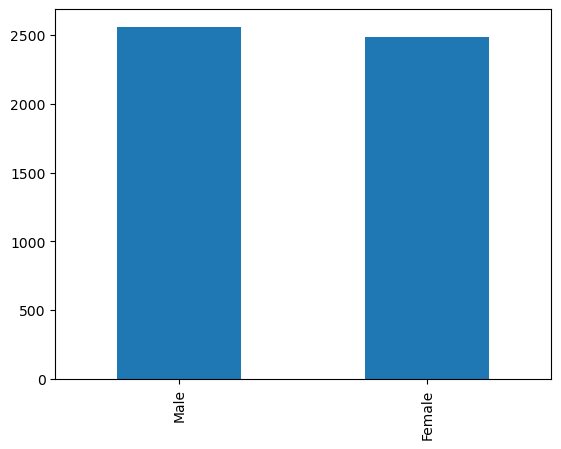

In [42]:
train_df['gender'].value_counts().plot.bar()

From the above, there is no much differences between the male and female,

We have 51% = Male while

49% = Female

In the entire dataset, the difference is 2%. This shows that their distribution is normally distributed or balanced.


In [43]:
train_df['SeniorCitizen'].value_counts()

No     4224
Yes     819
Name: SeniorCitizen, dtype: int64

In [44]:
train_df['SeniorCitizen'].value_counts(normalize = True)

No     0.837597
Yes    0.162403
Name: SeniorCitizen, dtype: float64

<AxesSubplot:title={'center':'SeniorCitizen'}>

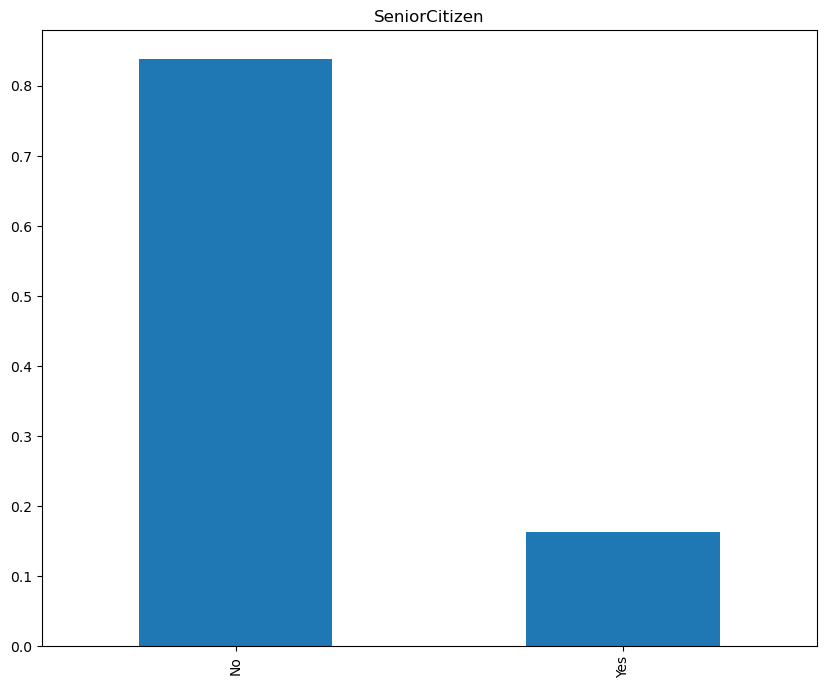

In [45]:
train_df['SeniorCitizen'].value_counts(normalize = True).plot.bar(figsize =(10,8), title = 'SeniorCitizen')

From the above graph,

1) 84% are not Senior Citizens

2) 16% are Senior Citizens.

Their distribution is not normally distributed. Hence it is imbalanced.

In [46]:
train_df['Partner'].value_counts()

No     2585
Yes    2458
Name: Partner, dtype: int64

In [47]:
train_df['Partner'].value_counts(normalize = True)

No     0.512592
Yes    0.487408
Name: Partner, dtype: float64

<AxesSubplot:title={'center':'Partner'}>

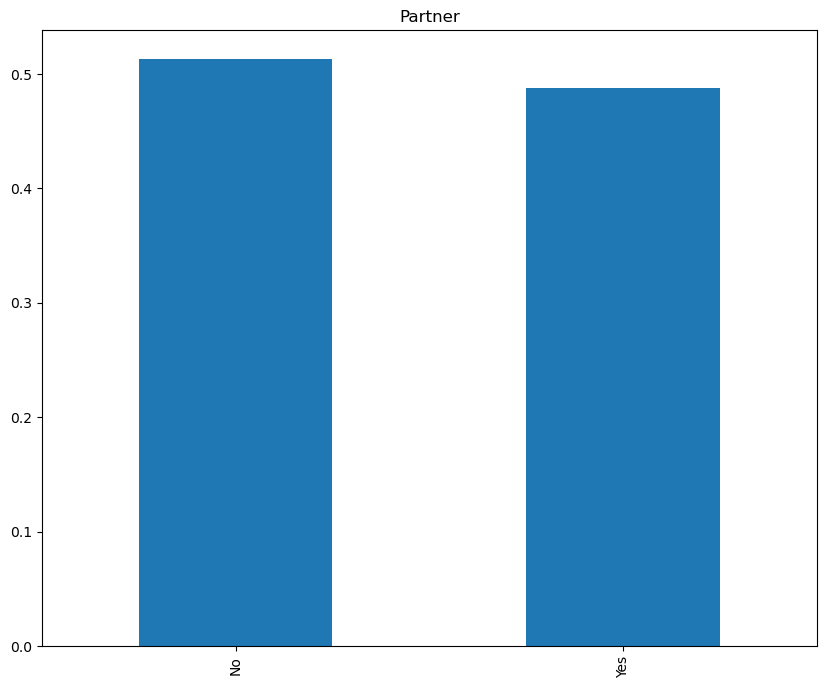

In [48]:
train_df['Partner'].value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Partner')

From the analysis above, we can deduce the followings:

1) Total numbers of partners = 2,458 (49%)

2) Total numbers of non partners = 2,585 (51%)

Their difference is 2% which show that they are equally distributed.

In [49]:
train_df['Dependents'].value_counts()

No     3482
Yes    1561
Name: Dependents, dtype: int64

In [50]:
train_df['Dependents'].value_counts(normalize = True)

No     0.690462
Yes    0.309538
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':'Dependents'}>

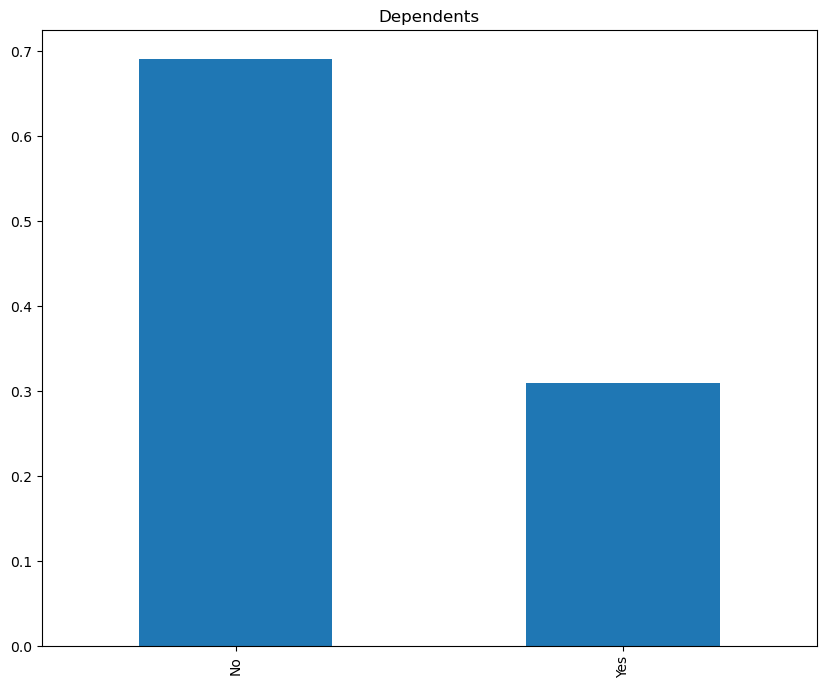

In [51]:
train_df['Dependents'].value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Dependents')

Analysis:

1) Total no of dependants = 1,561 (31%)

2) Total no of independants = 3,482 (69%)

The Distribution is not equally distributed. Imbalanced data.


## BIVARIATE ANALYSIS

### Let us look at the relationship between the target variable and the Categorical variables. With the Bar Plot below, we can see the proportion of the Churned (Yes) and Not Churn (No).

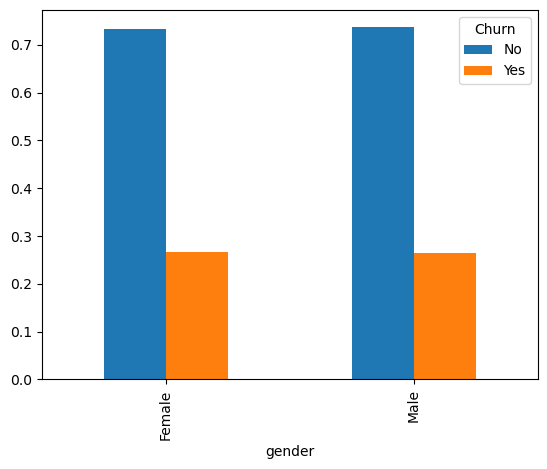

In [220]:
Gender = pd.crosstab(train_df['gender'],train_df['Churn'])

Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

About 7

In [53]:
#(train['gender'],train['Churn']).value_counts()

train_df[['gender','Churn']].value_counts()

gender  Churn
Male    No       1883
Female  No       1823
Male    Yes       675
Female  Yes       661
dtype: int64

In [54]:
train_df[['gender','Churn']].value_counts(normalize = True)

gender  Churn
Male    No       0.373463
Female  No       0.361563
Male    Yes      0.133875
Female  Yes      0.131099
dtype: float64

<AxesSubplot:title={'center':'Churn Rate'}, xlabel='gender,Churn'>

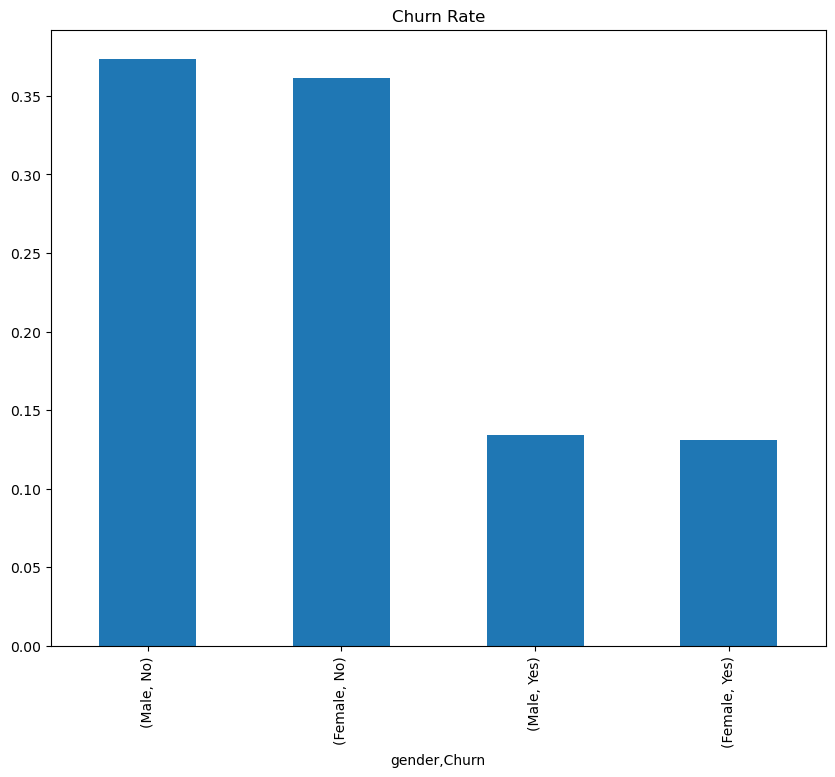

In [55]:
train_df[['gender','Churn']].value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Churn Rate')

37% of male and 36% of female did not churn while 13.38% Male and 13.10 Female Churned. The churn rate of both male and female are closely related as they are almost the same as well as their retention rate.

## MULTIVARIATE ANALYSIS

Now, lets look at how three or more variables are related in the train dataset.

We shall be looking at the Numerical Columns to see how much they relate to one another.

In [56]:
# lets split our dataset into numeric and categorical datas

num_col = train_df.select_dtypes(exclude='object')

cat_col = train_df.select_dtypes(include='object')


In [57]:
num_col

,tenure,MonthlyCharges,TotalCharges
0,1,29.850000,29.850000
1,34,56.950001,1889.500000
2,2,53.849998,108.150002
3,45,42.299999,1840.750000
4,2,70.699997,151.649994
...,...,...,...
5038,24,84.800000,1990.500000
5039,72,103.200000,7362.900000
5040,11,29.600000,346.450000
5041,4,74.400000,306.600000


In [58]:
cat_col

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,No,Yes,No,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
5039,2234-XADUH,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
5040,4801-JZAZL,Female,No,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
5041,8361-LTMKD,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [222]:
# Checking the Correlations

num_col.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.240645,0.826264
MonthlyCharges,0.240645,1.000000,0.647007
TotalCharges,0.826264,0.647007,1.000000


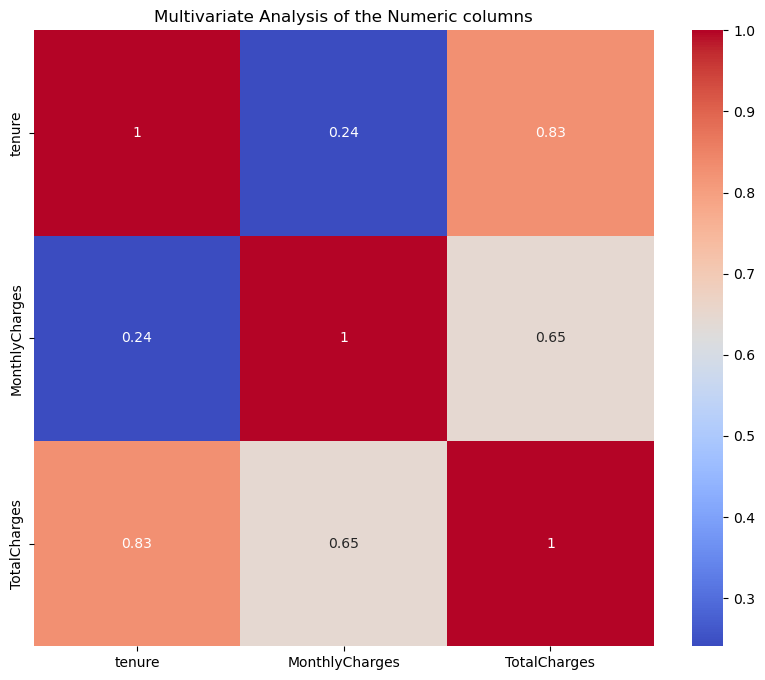

In [59]:
# Multivariate Analysis on the Numeric values

plt.figure(figsize=(10,8))
sns.heatmap(data = num_col.corr(), annot = True, cmap='coolwarm')
plt.title('Multivariate Analysis of the Numeric columns')
plt.show()

From theabove,

1) Total Charge is strongly correlated to the tenure

2) MonthlyCharge is not correlated to tenure and is also strongly correlated to TotalCharges

3) All of them are strongly correlated to themselves.

## FEATURE ENGINEERING

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model. 

In this project, we need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale.

In [60]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,No,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [61]:
# Dropping the Customer ID which is not relevant to the project.

train_df = train_df.drop(columns='customerID', axis=1)

train_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [62]:
train_df.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [63]:
# Filling the missing values with the mode of the features

train_df['Churn'].fillna(train_df['Churn'].mode()[0], inplace = True)

train_df['Churn'].fillna(train_df['Churn'].mode()[0], inplace = True)

train_df['TotalCharges'].fillna(train_df['TotalCharges'].mode()[0], inplace = True)

train_df['StreamingMovies'].fillna(train_df['StreamingMovies'].mode()[0], inplace = True)

train_df['StreamingTV'].fillna(train_df['StreamingTV'].mode()[0], inplace = True)

train_df['TechSupport'].fillna(train_df['TechSupport'].mode()[0], inplace = True)

train_df['DeviceProtection'].fillna(train_df['DeviceProtection'].mode()[0], inplace = True)

train_df['OnlineBackup'].fillna(train_df['OnlineBackup'].mode()[0], inplace = True)

#train_df['OnlineSecurity '].fillna(train_df['OnlineSecurity '].mode()[0], inplace = True)

train_df['MultipleLines'].fillna(train_df['MultipleLines'].mode()[0], inplace = True)

train_df = train_df.drop(columns='OnlineSecurity', axis=1)

In [64]:
train_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [65]:
# select independent variables

x = train_df.drop(columns='Churn')


# select dependent variables

y = train_df.loc[:, 'Churn']

# prove that the variables were selected correctly

print(x.columns)

# prove that the variables were selected correctly

print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')
Churn


In [66]:
x.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [67]:
x.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [68]:

# Seperating the train dataset into numerical and categorical variables

num_cols = x.select_dtypes(exclude='object').columns

cat_cols = x.select_dtypes(include='object').columns

### X - INPUT (INDEPENDENT VARIABLES) AND Y - OUTPUT VARIBLES (DEPENDENT VARIABLE) CREATION

First, we create a variable X to store the input (independent) attributes of the dataset. Additionally, we create a variable y to store only the output variable (Churn).

In [69]:
# APPLYING TRAIN_TEST

x_train,x_eval,y_train,y_eval = train_test_split(x, y,test_size=0.10,random_state=11, stratify = y)

print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)

print('Shape of x_eval and y_eval: ',x_eval.shape, y_eval.shape)

Shape of x_train and y_train:  (4538, 18) (4538,)
Shape of x_eval and y_eval:  (505, 18) (505,)


### NORMALIZING AND ENCODING OUR DATASET

In [70]:
# Applying OrdinalEnconder() for categorical binary variables and  StandardScaler() for numerical variables to scale it


cat_encoder = OrdinalEncoder()

num_scaler = StandardScaler()

# Apply SimpleImputer

num_imputer = SimpleImputer(strategy = 'median').set_output(transform = 'pandas')

cat_imputer = SimpleImputer(strategy = 'most_frequent').set_output(transform = 'pandas')


In [71]:
# Feature pipeline

num_pipe = Pipeline(steps = [('num_imputer', num_imputer), ('scaler', num_scaler)])

cat_pipe = Pipeline(steps = [('cat_imputer', cat_imputer), ('encoder', cat_encoder)])


In [72]:
# End2End_pipeline Features preprocessor 

preprocessor = ColumnTransformer([("StandardScaler", num_pipe, num_cols),
                                  ("OrdinalEncoder", cat_pipe, cat_cols),])
preprocessor.set_output(transform='pandas')



ColumnTransformer(transformers=[('StandardScaler',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('OrdinalEncoder',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [73]:
x_trained = preprocessor.fit_transform(x_train)

In [74]:
x_trained

,StandardScaler__tenure,StandardScaler__MonthlyCharges,StandardScaler__TotalCharges,OrdinalEncoder__gender,OrdinalEncoder__SeniorCitizen,OrdinalEncoder__Partner,OrdinalEncoder__Dependents,OrdinalEncoder__PhoneService,OrdinalEncoder__MultipleLines,OrdinalEncoder__InternetService,OrdinalEncoder__OnlineBackup,OrdinalEncoder__DeviceProtection,OrdinalEncoder__TechSupport,OrdinalEncoder__StreamingTV,OrdinalEncoder__StreamingMovies,OrdinalEncoder__Contract,OrdinalEncoder__PaperlessBilling,OrdinalEncoder__PaymentMethod
1742,-1.246440,0.727326,-0.937415,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2073,-0.756352,-1.522054,-0.893371,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0
1317,-1.205599,-1.364849,-0.980314,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0
1157,1.203997,1.088565,1.596363,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0
898,-0.838034,1.120340,-0.524632,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,1.530722,-1.346452,-0.229888,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0
3204,0.223822,-1.356487,-0.597393,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3049,-1.287281,-1.512020,-1.009449,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
343,1.244838,-1.501986,-0.433372,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0


In [75]:
x_eval_trained = preprocessor.fit_transform(x_eval)

In [76]:
# end2end Pipeline

clf_ = Pipeline([('preprocessor',preprocessor), ('model', None)]).set_output(transform = 'pandas')

clf_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', None)])

### DATA TRAINING USING THE .FIT METHOD

In [77]:
 clf_.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', None)])

## WE SHALL BE TRAINING OF THE FOLLOWING MODELS:

### 1) Logistic Regression.

### 2) Decision Trees.

### 3) Support Vector Machine.

### 4) Random Forest

### 5) KNeighborsClassifier

### OUR PERFORMANCE METRICS SHALL BE F1_SCORE

In [78]:
#Declaring our Performance metric

metric = f1_score

In [79]:
unique_labels = np.unique(y_train)

print(unique_labels)

['No' 'Yes']


In [80]:
pos_label = unique_labels[0]

In [81]:
# CREATE TRAINED MODELS LIST
models_trained = []


In [223]:
models_trained

[Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('StandardScaler',
                                                   Pipeline(steps=[('num_imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                  ('OrdinalEncoder',
                                                   Pipeline(steps=[('cat_imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('encoder',
                                                                    OrdinalEncoder

## LOGISTIC REGRESSION MODEL

In [83]:
lr = Pipeline([('preprocessor',preprocessor), ('model', LogisticRegression(random_state=42))]).set_output(transform = 'pandas')

In [84]:
lr.fit(x_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', LogisticRegression(random_state=42))])

In [85]:
models_trained.append(lr)

In [86]:
# MODEL EVALUATION USING THE EVALSET DATASET

y_eval_pred_lr = lr.predict(x_eval)

In [87]:
# Calculation the f1_score performance metric on Logistic Regression

f1_lr = f1_score(y_eval, y_eval_pred_lr,pos_label=pos_label)

print(f'Logistic Regression Model F1_Score is: {f1_lr}')

Logistic Regression Model F1_Score is: 0.8680738786279685


In [88]:
print(classification_report(y_eval, y_eval_pred_lr))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       371
         Yes       0.64      0.57      0.60       134

    accuracy                           0.80       505
   macro avg       0.75      0.73      0.74       505
weighted avg       0.80      0.80      0.80       505



In [276]:
y_test_pred = lr.predict(test_df)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: ''

### TREATING IMBALACE DATASET.

FROM THE F1_SCORE IT SHOWS THAT OUR DATASET IS IMBALANCE. IT IS NOT NORMALLY DISTRIBUTED. AND THIS WILL AMKE OUR MAKE NOT MAKE A CORRECT PREDICTIONS.

#### WE WILL USE THE OVERSAMPLE TECHNIQUE TO SAMPLE OUR DATASET TO MAKE IT NORMALLY DISTRIBUTED. the smallest 

### OVERSAMPLE TECHNIQUE USING RANDOMOVERSAMPLER

Oversampling is a technique which increases the number of samples of the smallest class up to the size of the biggest class. This is done by generating synthetic samples. Different techniques can be applied to oversample a class. Such as RandomOverSampler and SMOTE. 

The over samplers provide a function, called fit_resample(), which receives the X_train input variable and the y_train output variable and return the over sampled input and output variables, respectively X_res and y_res.

In [89]:
over_sampler = RandomOverSampler(random_state=42)

x_res, y_res = over_sampler.fit_resample(x_train, y_train)

In [90]:
# APPLYING TRAIN_TEST TO THE RESAMPLED DATASET INPUT 'X_RES' AND OUTPUT 'Y_RES'

x_train_res,x_eval_res,y_train_res,y_eval_res = train_test_split(x_res, y_res,test_size=0.10,random_state=11, stratify = y_res)

print('Shape of x_train and y_train: ',x_train_res.shape, y_train_res.shape)

print('Shape of x_eval and y_eval: ',x_eval_res.shape, y_eval_res.shape)

Shape of x_train and y_train:  (6004, 18) (6004,)
Shape of x_eval and y_eval:  (668, 18) (668,)


In [91]:
# APPLYING THE RESAMPLED DATASET x_res AND y_res TO LINEAR REGRESSION MODEL.

model_02 = lr.fit(x_train_res, y_train_res)


In [92]:
# Model Evaluation

model_02.score(x_eval_res, y_eval_res)



0.7619760479041916

In [93]:
# Making Prediction with the resampled

y_pred_res = model_02.predict(x_eval_res)

In [94]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.79      0.72      0.75       334
         Yes       0.74      0.81      0.77       334

    accuracy                           0.76       668
   macro avg       0.76      0.76      0.76       668
weighted avg       0.76      0.76      0.76       668



In [95]:
#print(f1_score(y_eval, y_pred,pos_label=pos_label))

In [96]:
# Comapring imbalance and balanced results

#lr.score(x_eval, y_eval), model_02.score(x_eval_res, y_eval_res)

## DECISION TREE MODEL

In [97]:
dt_model = Pipeline([('preprocessor',preprocessor), ('model', DecisionTreeClassifier(random_state=40))]).set_output(transform = 'pandas')

In [98]:
dt_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=40))])

In [99]:
models_trained.append(dt_model)

In [100]:
y_eval_pred_dt = dt_model.predict(x_eval)

In [101]:
print(classification_report(y_eval, y_eval_pred_dt))

              precision    recall  f1-score   support

          No       0.81      0.81      0.81       371
         Yes       0.48      0.48      0.48       134

    accuracy                           0.72       505
   macro avg       0.65      0.65      0.65       505
weighted avg       0.72      0.72      0.72       505



In [102]:
# Calculation the f1_score performance metric on Decision tree model

f1_dt = f1_score(y_eval, y_eval_pred_dt,pos_label=pos_label)

print(f'Decision Tree Model F1_Score is: {f1_dt}')

Decision Tree Model F1_Score is: 0.8129205921938089


In [103]:
# APPLYING THE RESAMPLED DATASET TO OUR DECISION TREE MODEL

dt_model.fit(x_train_res, y_train_res)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=40))])

In [104]:
# Evaluating the model

dt_model.score(x_eval_res, y_eval_res)

0.8652694610778443

In [105]:
# Prediction

y_pred_res = dt_model.predict(x_eval_res)

In [106]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.95      0.77      0.85       334
         Yes       0.81      0.96      0.88       334

    accuracy                           0.87       668
   macro avg       0.88      0.87      0.86       668
weighted avg       0.88      0.87      0.86       668



In [107]:
# COMPARING IMBALANCED AND BALANCED DATA

#dt_model.score(x_eval, y_eval), dt_model.score(x_eval_res, y_eval_res)

## SUPPORT VECTOR MACHINE MODEL

In [108]:
svm = Pipeline([('preprocessor',preprocessor), ('model', SVC(random_state=30))]).set_output(transform = 'pandas')

In [109]:
svm.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', SVC(random_state=30))])

In [110]:
models_trained.append(svm)

In [111]:
y_eval_pred_svm = svm.predict(x_eval)

In [112]:
print(classification_report(y_eval, y_eval_pred_svm))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87       371
         Yes       0.65      0.48      0.55       134

    accuracy                           0.79       505
   macro avg       0.74      0.69      0.71       505
weighted avg       0.78      0.79      0.78       505



In [113]:
# Calculation the f1_score performance metric on Support Vector machine

f1_svm = f1_score(y_eval, y_eval_pred_svm,pos_label=pos_label)

print(f'Support Vector Machine F1_Score is: {f1_svm}')

Support Vector Machine F1_Score is: 0.8663239074550129


In [114]:
# APPLYING THE RESAMPLED DATASET TO OUR SUPPORT VECTOR MACHINE MODEL

svm.fit(x_train_res, y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', SVC(random_state=30))])

In [115]:
# Evaluate our Model

svm.score(x_eval_res, y_eval_res)

0.7634730538922155

In [116]:
# Making Prediction

y_pred_res = svm.predict(x_eval_res)

In [117]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.80      0.71      0.75       334
         Yes       0.74      0.82      0.78       334

    accuracy                           0.76       668
   macro avg       0.77      0.76      0.76       668
weighted avg       0.77      0.76      0.76       668



In [118]:
# COMPARING IMBALANCED AND BALANCED DATA

#svm.score(x_eval, y_eval), svm.score(x_eval_res, y_eval_res)

## RANDOM FOREST CLASSIFIER MODEL

In [119]:
rf = Pipeline([('preprocessor',preprocessor), ('model', RandomForestClassifier(random_state=10))]).set_output(transform = 'pandas')

In [120]:
 rf.fit(x_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=10))])

In [121]:
models_trained.append(rf)

In [122]:
y_eval_pred_rf = rf.predict(x_eval)

In [123]:
print(classification_report(y_eval, y_eval_pred_rf))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87       371
         Yes       0.68      0.49      0.57       134

    accuracy                           0.80       505
   macro avg       0.76      0.70      0.72       505
weighted avg       0.79      0.80      0.79       505



In [124]:
# Calculation the f1_score performance metric on RandomForestClassifier

f1_rf = f1_score(y_eval, y_eval_pred_rf,pos_label=pos_label)

print(f'Random Forest Classifier Model F1_Score is: {f1_rf}')

Random Forest Classifier Model F1_Score is: 0.8729139922978176


In [125]:
# APPLYING THE RESAMPLED DATASET TO OUR RANDOM FOREST MODEL

rf.fit(x_train_res, y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=10))])

In [126]:
# EVALUATING OUR BALANCED DATASET

rf.score(x_eval_res, y_eval_res)

0.8952095808383234

In [127]:
y_pred_res = rf.predict(x_eval_res)

In [128]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.96      0.82      0.89       334
         Yes       0.85      0.97      0.90       334

    accuracy                           0.90       668
   macro avg       0.90      0.90      0.89       668
weighted avg       0.90      0.90      0.89       668



In [129]:
# COMPARING IMBALANCED AND BALANCED DATA

#rf.score(x_eval, y_eval), rf.score(x_eval_res, y_eval_res)

## KNEIGHBORSCLASSIFIER MODEL

In [130]:
knn = Pipeline([('preprocessor',preprocessor), ('model', KNeighborsClassifier())]).set_output(transform = 'pandas')

In [131]:
knn.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [132]:
models_trained.append(knn)

In [133]:
# Evaluate the model on the evaluation dataset (Evalset)

y_eval_pred_knn = knn.predict(x_eval)

In [134]:
print(classification_report(y_eval, y_eval_pred_knn))

              precision    recall  f1-score   support

          No       0.83      0.87      0.85       371
         Yes       0.57      0.50      0.53       134

    accuracy                           0.77       505
   macro avg       0.70      0.68      0.69       505
weighted avg       0.76      0.77      0.76       505



In [135]:
# Calculation the f1_score performance metric on Logistic Regression

f1_knn = f1_score(y_eval, y_eval_pred_knn,pos_label=pos_label)

print(f' KNeighborsClassifier Model F1_Score is: {f1_knn}')

 KNeighborsClassifier Model F1_Score is: 0.8458498023715415


In [136]:
# APPLYING THE RESAMPLED DATASET TO OUR KNN MODEL

knn.fit(x_train_res, y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [137]:
knn.score(x_eval_res, y_eval_res)

0.7739520958083832

In [138]:
y_pred_res = knn.predict(x_eval_res)

In [139]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.85      0.66      0.75       334
         Yes       0.72      0.88      0.80       334

    accuracy                           0.77       668
   macro avg       0.79      0.77      0.77       668
weighted avg       0.79      0.77      0.77       668



In [140]:
# COMPARING THE IMBALANCED AND BALANCED DATASET

#knn.score(x_eval, y_eval), knn.score(x_eval_res, y_eval_res)

### COMPARING OUR MODEL

In [141]:
# F1-SCORES FOR ALL THE MODELS

print(f'Logistic Regression F1_Score is: {f1_lr}')

print()
print(f'Decision Tree Model F1_Score is: {f1_dt}')

print()
print(f'Support Vector Machine F1_Score is: {f1_svm}')

print()
print(f'Random Forest Classifier F1_Score is: {f1_rf}')

print()
print(f' KNeighborsClassifier F1_Score is: {f1_knn}')

Logistic Regression F1_Score is: 0.8680738786279685

Decision Tree Model F1_Score is: 0.8129205921938089

Support Vector Machine F1_Score is: 0.8663239074550129

Random Forest Classifier F1_Score is: 0.8729139922978176

 KNeighborsClassifier F1_Score is: 0.8458498023715415


### From the above information, our three best performing models using f1_score metric are:

### 1. RandomForestClassifier (0.875) = 88%

### 2. Support Vector Machine (0.828) = 83%

### 3. Decision Tree (0.821) = 82%


In [142]:
# CREATE A MODEL LIST TO BE TRAINED

#models = [('Logistic Regression', LogisticRegression()),
          #('Decision Tree', DecisionTreeClassifier()), 
          #('KNeighbors', KNeighborsClassifier()), 
          #('Random Forest', RandomForestClassifier()), 
          #('Support Vector Machine', SVC())
         #]


#results_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','Balanced_Accuracy'])


In [143]:
#for model_name, model in models:
    #model.fit(x_trained, y_train)



In [144]:
#y_eval_pred = model.predict(x_eval_trained)

In [145]:
#performance metrics

#accuracy = accuracy_score(y_eval, y_eval_pred)
#precision = precision_score(y_eval, y_eval_pred, pos_label=pos_label)
#recall = recall_score(y_eval, y_eval_pred,pos_label=pos_label)
#f1 = f1_score(y_eval, y_eval_pred, pos_label=pos_label)
#balanced = balanced_accuracy_score(y_eval, y_eval_pred)


In [146]:
#results_df = results_df.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision,
                           #'Recall': recall, 'F1_Score': f1, 'Balanced_Accuracy':balanced}, ignore_index = True)


#pd.set_option('display.max_rows', None)

#results_df

In [147]:
#info = [{'Model_Name': models.__str__(), f'Metric({metric.__name__})': 
         #metric(y_true = y_eval),
         #y_eval_pred = models.predict(x_eval),
         #pos_label = 'Yes'
         #)}for models in models_trained]

### HYPERPARAMETER TUNING OF OUR THREE BEST MODELS

In [148]:
# Creating a holder for the best model

best_models_trained =[]

In [149]:
# Encoding the y variable

le = LabelEncoder().fit(y)

In [150]:
# OUR BEST MODELS

model2 = [rf, svm, dt_model]


## HYPERPARAMETER TUNING OF THE 1ST MODEL

In [151]:
# Getting parameters for the first model in the list - rf model

model2[0].get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('StandardScaler',
                                    Pipeline(steps=[('num_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                   ('OrdinalEncoder',
                                    Pipeline(steps=[('cat_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OrdinalEncoder())]),
                                    Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
          'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       

In [152]:
  # Manually Selecting different parameters to check
    
parameters = {
  'model__n_estimators':[1,10,100,1000],
  'model__min_samples_split': [2,3,4,5]
  }

In [153]:
# instantiate the searcher

searcher = GridSearchCV(estimator = model2[0], 
                    param_grid = parameters, 
                    scoring = ['accuracy', 'f1', 'precision', 'recall','balanced_accuracy','roc_auc'],
                    refit = 'f1',
                    cv = 5,
                    verbose = 3)

In [154]:
# fit

searcher.fit(x_train, le.transform(y_train))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END model__min_samples_split=2, model__n_estimators=1; accuracy: (test=0.727) balanced_accuracy: (test=0.647) f1: (test=0.481) precision: (test=0.485) recall: (test=0.477) roc_auc: (test=0.647) total time=   0.1s
[CV 2/5] END model__min_samples_split=2, model__n_estimators=1; accuracy: (test=0.716) balanced_accuracy: (test=0.650) f1: (test=0.488) precision: (test=0.468) recall: (test=0.510) roc_auc: (test=0.650) total time=   0.1s
[CV 3/5] END model__min_samples_split=2, model__n_estimators=1; accuracy: (test=0.748) balanced_accuracy: (test=0.668) f1: (test=0.512) precision: (test=0.524) recall: (test=0.500) roc_auc: (test=0.668) total time=   0.1s
[CV 4/5] END model__min_samples_split=2, model__n_estimators=1; accuracy: (test=0.725) balanced_accuracy: (test=0.651) f1: (test=0.487) precision: (test=0.482) recall: (test=0.492) roc_auc: (test=0.650) total time=   0.0s
[CV 5/5] END model__min_samples_split=2, model__n_e

[CV 3/5] END model__min_samples_split=3, model__n_estimators=1000; accuracy: (test=0.802) balanced_accuracy: (test=0.706) f1: (test=0.573) precision: (test=0.665) recall: (test=0.504) roc_auc: (test=0.838) total time=  10.4s
[CV 4/5] END model__min_samples_split=3, model__n_estimators=1000; accuracy: (test=0.795) balanced_accuracy: (test=0.709) f1: (test=0.575) precision: (test=0.636) recall: (test=0.525) roc_auc: (test=0.827) total time=  12.2s
[CV 5/5] END model__min_samples_split=3, model__n_estimators=1000; accuracy: (test=0.819) balanced_accuracy: (test=0.730) f1: (test=0.613) precision: (test=0.707) recall: (test=0.542) roc_auc: (test=0.846) total time=  12.1s
[CV 1/5] END model__min_samples_split=4, model__n_estimators=1; accuracy: (test=0.724) balanced_accuracy: (test=0.634) f1: (test=0.460) precision: (test=0.478) recall: (test=0.444) roc_auc: (test=0.679) total time=   0.0s
[CV 2/5] END model__min_samples_split=4, model__n_estimators=1; accuracy: (test=0.725) balanced_accurac

[CV 5/5] END model__min_samples_split=5, model__n_estimators=100; accuracy: (test=0.820) balanced_accuracy: (test=0.734) f1: (test=0.618) precision: (test=0.706) recall: (test=0.550) roc_auc: (test=0.849) total time=   1.5s
[CV 1/5] END model__min_samples_split=5, model__n_estimators=1000; accuracy: (test=0.793) balanced_accuracy: (test=0.705) f1: (test=0.571) precision: (test=0.635) recall: (test=0.519) roc_auc: (test=0.835) total time=  11.7s
[CV 2/5] END model__min_samples_split=5, model__n_estimators=1000; accuracy: (test=0.798) balanced_accuracy: (test=0.699) f1: (test=0.561) precision: (test=0.665) recall: (test=0.485) roc_auc: (test=0.839) total time=  11.1s
[CV 3/5] END model__min_samples_split=5, model__n_estimators=1000; accuracy: (test=0.801) balanced_accuracy: (test=0.703) f1: (test=0.568) precision: (test=0.665) recall: (test=0.496) roc_auc: (test=0.839) total time=  11.2s
[CV 4/5] END model__min_samples_split=5, model__n_estimators=1000; accuracy: (test=0.792) balanced_ac

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('StandardScaler',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('OrdinalEncoder',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_f...
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=10))]),
             param_grid={'model__min_samples_split': [2, 3, 4, 5],
                         'model__n_estimators': [1, 10, 100, 1000]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall',
                      'balanced_accuracy', 'roc_auc'],
             verbose=3)

In [155]:
searcher.best_params_

{'model__min_samples_split': 5, 'model__n_estimators': 1000}

In [156]:
searcher.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   Ordina...oder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(min_samples_split=5, n_estimators=1000,
                                        random_state=10))])

In [157]:
best_models_trained.append(searcher.best_estimator_)

In [237]:
searcher.best_score_

print(f' Support RandomForestClassifier Best Score is: {searcher.best_score_}')

 Support RandomForestClassifier Best Score is: 0.5782692044487397


## HYPERPARAMETER TUNING OF THE 2ND MODEL

In [158]:
#  Getting parameters for the second model in the list - Support Vector Machine model


model2[1].get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('StandardScaler',
                                    Pipeline(steps=[('num_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                   ('OrdinalEncoder',
                                    Pipeline(steps=[('cat_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OrdinalEncoder())]),
                                    Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
          'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       

In [159]:
  # Manually Selecting different parameters to check
    
parameters2 = {
  'model__random_state':[30],
  'model__degree':[3,4,5,6,7],
  'model__max_iter':[-1,1,2,3,4]
  }

In [160]:
# instantiate the searcher

searcher2 = GridSearchCV(estimator = model2[1], 
                    param_grid = parameters2, 
                    scoring = ['accuracy', 'f1', 'precision', 'recall','balanced_accuracy','roc_auc'],
                    refit = 'f1',
                    cv = 5,
                    verbose = 3)

In [161]:
# fit

searcher2.fit(x_train, le.transform(y_train))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END model__degree=3, model__max_iter=-1, model__random_state=30; accuracy: (test=0.805) balanced_accuracy: (test=0.708) f1: (test=0.578) precision: (test=0.680) recall: (test=0.502) roc_auc: (test=0.807) total time=   1.8s
[CV 2/5] END model__degree=3, model__max_iter=-1, model__random_state=30; accuracy: (test=0.798) balanced_accuracy: (test=0.683) f1: (test=0.534) precision: (test=0.691) recall: (test=0.436) roc_auc: (test=0.788) total time=   2.1s
[CV 3/5] END model__degree=3, model__max_iter=-1, model__random_state=30; accuracy: (test=0.795) balanced_accuracy: (test=0.683) f1: (test=0.535) precision: (test=0.669) recall: (test=0.446) roc_auc: (test=0.816) total time=   1.7s
[CV 4/5] END model__degree=3, model__max_iter=-1, model__random_state=30; accuracy: (test=0.803) balanced_accuracy: (test=0.696) f1: (test=0.558) precision: (test=0.685) recall: (test=0.471) roc_auc: (test=0.800) total time=   1.6s
[CV 5/5] E

[CV 3/5] END model__degree=4, model__max_iter=2, model__random_state=30; accuracy: (test=0.709) balanced_accuracy: (test=0.622) f1: (test=0.443) precision: (test=0.449) recall: (test=0.438) roc_auc: (test=0.690) total time=   0.1s
[CV 4/5] END model__degree=4, model__max_iter=2, model__random_state=30; accuracy: (test=0.680) balanced_accuracy: (test=0.495) f1: (test=0.142) precision: (test=0.245) recall: (test=0.100) roc_auc: (test=0.604) total time=   0.0s
[CV 5/5] END model__degree=4, model__max_iter=2, model__random_state=30; accuracy: (test=0.729) balanced_accuracy: (test=0.676) f1: (test=0.523) precision: (test=0.489) recall: (test=0.562) roc_auc: (test=0.738) total time=   0.1s
[CV 1/5] END model__degree=4, model__max_iter=3, model__random_state=30; accuracy: (test=0.716) balanced_accuracy: (test=0.514) f1: (test=0.134) precision: (test=0.351) recall: (test=0.083) roc_auc: (test=0.713) total time=   0.0s
[CV 2/5] END model__degree=4, model__max_iter=3, model__random_state=30; acc

[CV 5/5] END model__degree=5, model__max_iter=4, model__random_state=30; accuracy: (test=0.760) balanced_accuracy: (test=0.667) f1: (test=0.509) precision: (test=0.554) recall: (test=0.471) roc_auc: (test=0.747) total time=   0.1s
[CV 1/5] END model__degree=6, model__max_iter=-1, model__random_state=30; accuracy: (test=0.805) balanced_accuracy: (test=0.708) f1: (test=0.578) precision: (test=0.680) recall: (test=0.502) roc_auc: (test=0.807) total time=   1.6s
[CV 2/5] END model__degree=6, model__max_iter=-1, model__random_state=30; accuracy: (test=0.798) balanced_accuracy: (test=0.683) f1: (test=0.534) precision: (test=0.691) recall: (test=0.436) roc_auc: (test=0.788) total time=   1.6s
[CV 3/5] END model__degree=6, model__max_iter=-1, model__random_state=30; accuracy: (test=0.795) balanced_accuracy: (test=0.683) f1: (test=0.535) precision: (test=0.669) recall: (test=0.446) roc_auc: (test=0.816) total time=   2.0s
[CV 4/5] END model__degree=6, model__max_iter=-1, model__random_state=30;

[CV 1/5] END model__degree=7, model__max_iter=2, model__random_state=30; accuracy: (test=0.696) balanced_accuracy: (test=0.508) f1: (test=0.159) precision: (test=0.299) recall: (test=0.108) roc_auc: (test=0.634) total time=   0.1s
[CV 2/5] END model__degree=7, model__max_iter=2, model__random_state=30; accuracy: (test=0.709) balanced_accuracy: (test=0.533) f1: (test=0.224) precision: (test=0.384) recall: (test=0.158) roc_auc: (test=0.634) total time=   0.1s
[CV 3/5] END model__degree=7, model__max_iter=2, model__random_state=30; accuracy: (test=0.709) balanced_accuracy: (test=0.622) f1: (test=0.443) precision: (test=0.449) recall: (test=0.438) roc_auc: (test=0.690) total time=   0.1s
[CV 4/5] END model__degree=7, model__max_iter=2, model__random_state=30; accuracy: (test=0.680) balanced_accuracy: (test=0.495) f1: (test=0.142) precision: (test=0.245) recall: (test=0.100) roc_auc: (test=0.604) total time=   0.0s
[CV 5/5] END model__degree=7, model__max_iter=2, model__random_state=30; acc

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('StandardScaler',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('OrdinalEncoder',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_f...
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('model', SVC(random_state=30))]),
             param_grid={'model__degree': [3, 4, 5, 6, 7],
                         'model__max_iter': [-1, 1, 2, 3, 4],
                         'model__random_state': [30]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall',
                      'balanced_accuracy', 'roc_auc'],
             verbose=3)

In [162]:
searcher2.best_params_

{'model__degree': 3, 'model__max_iter': -1, 'model__random_state': 30}

In [163]:
searcher2.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', SVC(random_state=30))])

In [164]:
best_models_trained.append(searcher2.best_estimator_)

In [236]:
searcher2.best_score_

print(f' Support Vector Machine Best Score is: {searcher2.best_score_}')

 Support Vector Machine Best Score is: 0.5565661832181215


## HYPERPARAMETER TUNING OF THE 3RD MODEL

In [165]:
#  Getting parameters for the second model in the list - Decision Tree model


model2[2].get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('StandardScaler',
                                    Pipeline(steps=[('num_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                   ('OrdinalEncoder',
                                    Pipeline(steps=[('cat_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OrdinalEncoder())]),
                                    Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
          'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       

In [166]:
# make lists of different parameters to check
parameters3 = {
  'model__min_samples_leaf':[1,3,4,5,6],
  'model__random_state': [40],
  'model__min_samples_split':[1,2,3,4,5],
  'model__ccp_alpha':[0.0, 1.0,2.0,3.0,4.0]
  }


In [167]:
# instantiate the searcher

searcher3 = GridSearchCV(estimator = model2[2], 
                    param_grid = parameters3, 
                    scoring = ['accuracy', 'f1', 'precision', 'recall','balanced_accuracy','roc_auc'],
                    refit = 'f1',
                    cv = 5,
                    verbose = 3)

In [168]:
# fit

searcher3.fit(x_train, le.transform(y_train))

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END model__ccp_alpha=0.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 2/5] END model__ccp_alpha=0.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END model__ccp_alpha=0.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 4/5] END model__ccp_alpha=0.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (te

[CV 2/5] END model__ccp_alpha=0.0, model__min_samples_leaf=3, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.729) balanced_accuracy: (test=0.650) f1: (test=0.485) precision: (test=0.489) recall: (test=0.481) roc_auc: (test=0.706) total time=   0.1s
[CV 3/5] END model__ccp_alpha=0.0, model__min_samples_leaf=3, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.746) balanced_accuracy: (test=0.660) f1: (test=0.499) precision: (test=0.520) recall: (test=0.479) roc_auc: (test=0.718) total time=   0.1s
[CV 4/5] END model__ccp_alpha=0.0, model__min_samples_leaf=3, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.744) balanced_accuracy: (test=0.681) f1: (test=0.530) precision: (test=0.516) recall: (test=0.546) roc_auc: (test=0.727) total time=   0.1s
[CV 5/5] END model__ccp_alpha=0.0, model__min_samples_leaf=3, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.730) balanced_accuracy: (test=0.636) f1: (test=0.462

[CV 3/5] END model__ccp_alpha=0.0, model__min_samples_leaf=4, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.767) balanced_accuracy: (test=0.670) f1: (test=0.514) precision: (test=0.571) recall: (test=0.467) roc_auc: (test=0.747) total time=   0.1s
[CV 4/5] END model__ccp_alpha=0.0, model__min_samples_leaf=4, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.771) balanced_accuracy: (test=0.691) f1: (test=0.546) precision: (test=0.573) recall: (test=0.521) roc_auc: (test=0.747) total time=   0.1s
[CV 5/5] END model__ccp_alpha=0.0, model__min_samples_leaf=4, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.727) balanced_accuracy: (test=0.629) f1: (test=0.449) precision: (test=0.481) recall: (test=0.421) roc_auc: (test=0.726) total time=   0.1s
[CV 1/5] END model__ccp_alpha=0.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.741) balanced_accuracy: (test=0.661) f1: (test=0.501

[CV 5/5] END model__ccp_alpha=0.0, model__min_samples_leaf=5, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.734) balanced_accuracy: (test=0.634) f1: (test=0.456) precision: (test=0.498) recall: (test=0.421) roc_auc: (test=0.749) total time=   0.1s
[CV 1/5] END model__ccp_alpha=0.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.731) balanced_accuracy: (test=0.658) f1: (test=0.498) precision: (test=0.494) recall: (test=0.502) roc_auc: (test=0.729) total time=   0.2s
[CV 2/5] END model__ccp_alpha=0.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.742) balanced_accuracy: (test=0.670) f1: (test=0.515) precision: (test=0.515) recall: (test=0.515) roc_auc: (test=0.753) total time=   0.2s
[CV 3/5] END model__ccp_alpha=0.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.759) balanced_accuracy: (test=0.673) f1: (test=0.519

[CV 3/5] END model__ccp_alpha=1.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 4/5] END model__ccp_alpha=1.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 5/5] END model__ccp_alpha=1.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 1/5] END model__ccp_alpha=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (t

[CV 4/5] END model__ccp_alpha=1.0, model__min_samples_leaf=3, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.4s
[CV 5/5] END model__ccp_alpha=1.0, model__min_samples_leaf=3, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.2s
[CV 1/5] END model__ccp_alpha=1.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END model__ccp_alpha=1.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 1/5] END model__ccp_alpha=1.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END model__ccp_alpha=1.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 3/5] END model__ccp_alpha=1.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=1.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 3/5] END model__ccp_alpha=1.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=1.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=1.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.3s
[CV 1/5] END model__ccp_alpha=1.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) prec

[CV 1/5] END model__ccp_alpha=2.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END model__ccp_alpha=2.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 3/5] END model__ccp_alpha=2.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=2.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 2/5] END model__ccp_alpha=2.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 3/5] END model__ccp_alpha=2.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=2.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=2.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 3/5] END model__ccp_alpha=2.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=2.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=2.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END model__ccp_alpha=2.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 5/5] END model__ccp_alpha=2.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END model__ccp_alpha=2.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 2/5] END model__ccp_alpha=2.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END model__ccp_alpha=2.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall

[CV 1/5] END model__ccp_alpha=3.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.3s
[CV 2/5] END model__ccp_alpha=3.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.3s
[CV 3/5] END model__ccp_alpha=3.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=3.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 2/5] END model__ccp_alpha=3.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.3s
[CV 3/5] END model__ccp_alpha=3.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.2s
[CV 4/5] END model__ccp_alpha=3.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=3.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 3/5] END model__ccp_alpha=3.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=3.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.3s
[CV 5/5] END model__ccp_alpha=3.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END model__ccp_alpha=3.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 4/5] END model__ccp_alpha=3.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.2s
[CV 5/5] END model__ccp_alpha=3.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END model__ccp_alpha=3.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 2/5] END model__ccp_alpha=3.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test

[CV 1/5] END model__ccp_alpha=4.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END model__ccp_alpha=4.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 3/5] END model__ccp_alpha=4.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=4.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 2/5] END model__ccp_alpha=4.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 3/5] END model__ccp_alpha=4.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=4.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=4.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 3/5] END model__ccp_alpha=4.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=4.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=4.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END model__ccp_alpha=4.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 4/5] END model__ccp_alpha=4.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.2s
[CV 5/5] END model__ccp_alpha=4.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END model__ccp_alpha=4.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 2/5] END model__ccp_alpha=4.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('StandardScaler',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('OrdinalEncoder',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_f...
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=40))]),
             param_grid={'model__ccp_alpha': [0.0, 1.0, 2.0, 3.0, 4.0],
                         'model__min_samples_leaf': [1, 3, 4, 5, 6],
                         'model__min_samples_split': [1, 2, 3, 4, 5],
                         'model__random_state': [40]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall',
                      'balanced_accuracy', 'roc_auc'],
             verbose=3)

In [169]:
searcher3.best_params_

{'model__ccp_alpha': 0.0,
 'model__min_samples_leaf': 6,
 'model__min_samples_split': 2,
 'model__random_state': 40}

In [170]:
searcher3.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(min_samples_leaf=6, random_state=40))])

In [171]:
best_models_trained.append(searcher3.best_estimator_)

In [235]:
searcher3.best_score_

print(f' DecisionTree Best Score is: {searcher3.best_score_}')

 DecisionTree Best Score is: 0.5196179723976394


### MODELS COMPARISON

In [233]:
print(f' RandomForest Best Score is: {searcher.best_score_}')

print(f' Support Vector Machine Best Score is: {searcher2.best_score_}')

print(f' DecisionTree Best Score is: {searcher3.best_score_}')

 RandomForest Best Score is: 0.5782692044487397
 Support Vector Machine Best Score is: 0.5565661832181215
 DecisionTree Best Score is: 0.5196179723976394


## From the above, our Best Model is RandomForestClassifier Model.

## RandomForestClassifier = 58%

## Support Vector Machine = 56%

## DecisionTree = 52%

### EXPORTING KEY COMPONENTS

In [173]:
searcher_best_estimators = best_models_trained

components = {'num_imputer': num_imputer, 'cat_imputer': cat_imputer, 
              'encoder': OrdinalEncoder, 'scaler': StandardScaler,
              'models': model2, 
              'searcher_best_estimator':best_models_trained
              }

In [174]:
# creating file called export to hold the components

!mkdir export

A subdirectory or file export already exists.


In [175]:
destination = os.path.join('.', 'export')

In [176]:
with open(os.path.join(destination, 'ml.pkl'), 'wb') as f:
    pickle.dump(components, f)


In [177]:
!pip freeze > export/requirements.txt

In [178]:
#!zip - r export.zip export/

## HYPOTHESIS TESTING


### HYPOTHESIS STATEMENT

#### H0: CHURN RATE IS NOT DEPENDENT ON THE GENDER

#### H1: CHURN RATE IS DEPENDENT ON THE GENDER


### ANALYTICAL QUESTIONS

#### 1) What is the total charges of all the services

#### 2) What is the total charges of males and females respectively.

#### 3) Which services has the highest churn rate

#### 4) Which Services has the highest charge

#### 5) Which Gender churn the most.

In [179]:
train_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,DSL,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,No,DSL,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,No,Yes,Yes,24,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,Female,No,Yes,Yes,11,No,No,DSL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


### HYPOTHESIS TESTING USING CHI-SQUARED TEST

### OUR SIGNIFICANT LEVEL IS 5% (ALPHA = 0.05)

In [180]:
#The easiest way to apply a chi-squared test is to compute the contigency table.
 
contigency= pd.crosstab(train_df['gender'], train_df['Churn'])
contigency

Churn,No,Yes
gender,,
Female,1823,661
Male,1884,675


In [181]:
#Chi-square test of independence.

c, p, dof, expected = chi2_contingency(contigency)
 
print("p_value: ",round(p,3))

p_value:  0.877


In [182]:
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.8765122032778316
Independent (H0 holds true)


Since,

p-value > alpha 

Therefore, we accept H0, which shows that our variables do not have a significant relation. Churn rate does not depend on the gender.

<AxesSubplot:title={'center':'CHI-SQUARED TEST'}, xlabel='No,Yes'>

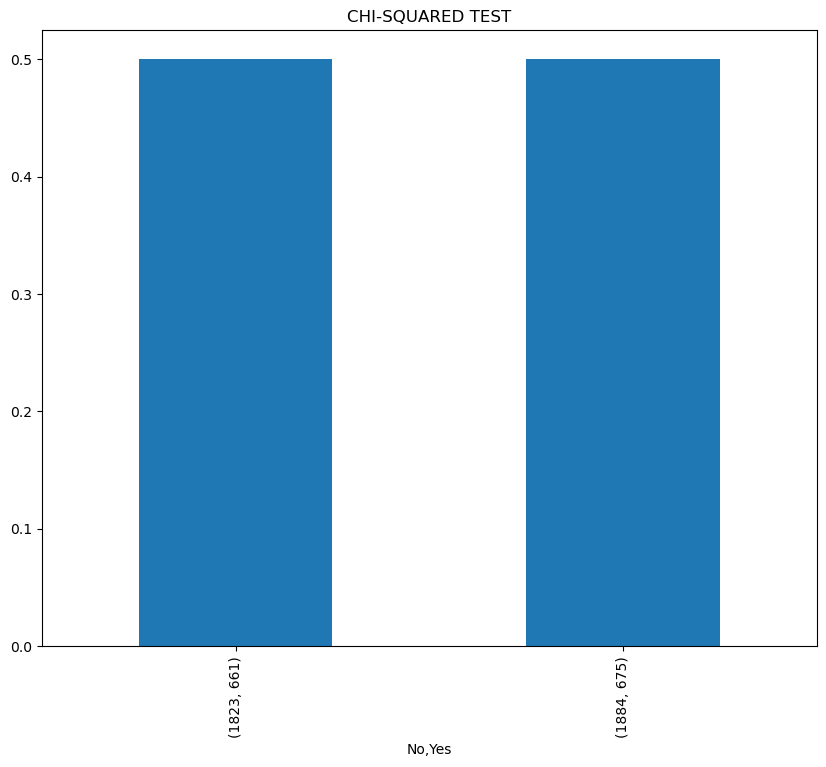

In [183]:
contigency.value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'CHI-SQUARED TEST')

### ANALYTICAL QUESTIONS

#### 1) What is the total charges of all the services

#### 2) What is the total charges of males and females respectively.

#### 3) Which services has the highest churn rate

#### 4) Which Services has the highest charge

#### 5) Which Gender churn the most.

In [184]:
# 1) What is the total charges of all the services

Total_charges_of_services = train_df['TotalCharges']

Total_charges_of_services.sum()

print(f' The Total Annual Charges is: {Total_charges_of_services.sum()}')

 The Total Annual Charges is: 11591044.503777694


In [185]:
# 2) What is the total charges of males and females respectively.

df = train_df[['gender','TotalCharges']]

df.head()

,gender,TotalCharges
0,Female,29.850000
1,Male,1889.500000
2,Male,108.150002
3,Male,1840.750000
4,Female,151.649994


In [186]:
# Total charges for females

female_df = df[df['gender'] == 'Female']


In [187]:
female_df.head()

,gender,TotalCharges
0,Female,29.850000
4,Female,151.649994
5,Female,820.500000
7,Female,301.899994
8,Female,3046.050049


In [188]:
Females_total_charges = female_df['TotalCharges'].sum()

print(f'The Total Charges for all the Female is : {Females_total_charges}')

The Total Charges for all the Female is : 5721222.055768967


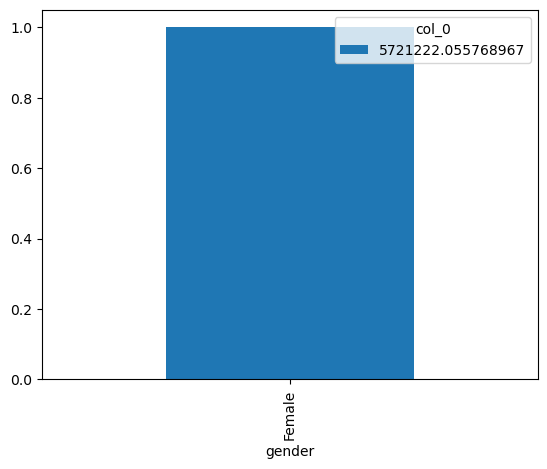

In [189]:
female_charges = pd.crosstab(female_df['gender'],female_df['TotalCharges'].sum())

female_charges.div(female_charges.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

In [190]:
# Total Charges for all the Males

male_df = df[df['gender'] == 'Male']

In [191]:
male_df.head()

,gender,TotalCharges
1,Male,1889.500000
2,Male,108.150002
3,Male,1840.750000
6,Male,1949.400024
9,Male,3487.949951


In [192]:
Male_total_charges = male_df['TotalCharges'].sum()

print(f'The Total Charges for all the Male is : {Male_total_charges}')

The Total Charges for all the Male is : 5869822.448008728


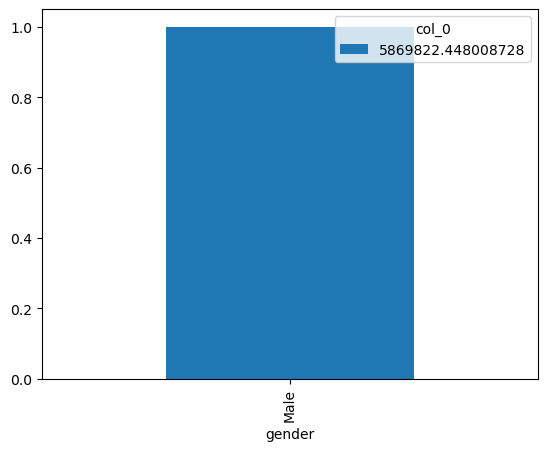

In [193]:
male_charges = pd.crosstab(male_df['gender'],male_df['TotalCharges'].sum())

male_charges.div(male_charges.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

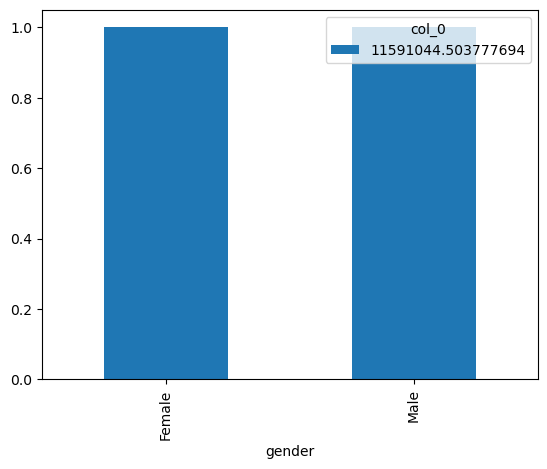

In [194]:
total_charges = pd.crosstab(df['gender'],df['TotalCharges'].sum())

total_charges.div(total_charges.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

In [195]:
# 3) Which services has the highest churn rate

train_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [261]:
# .value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Churn Rate')

train_df[['PhoneService','Churn']].value_counts(normalize = True)

PhoneService  Churn
Yes           No       0.661908
              Yes      0.241126
No            No       0.073171
              Yes      0.023795
dtype: float64

In [263]:
#services.value_counts(normalize = True)

train_df[['InternetService','Churn']].value_counts(normalize = True)

InternetService  Churn
DSL              No       0.278802
Fiber optic      No       0.257188
No               No       0.199088
Fiber optic      Yes      0.188578
DSL              Yes      0.061273
No               Yes      0.015070
dtype: float64

In [264]:
train_df[['OnlineBackup','Churn']].value_counts(normalize = True)

OnlineBackup         Churn
No                   No       0.387071
Yes                  No       0.270276
No                   Yes      0.184414
No internet service  No       0.077732
Yes                  Yes      0.073171
No internet service  Yes      0.007337
dtype: float64

In [265]:
train_df[['DeviceProtection','Churn']].value_counts(normalize = True)

DeviceProtection     Churn
No                   No       0.389451
Yes                  No       0.267896
No                   Yes      0.179655
Yes                  Yes      0.077930
No internet service  No       0.077732
                     Yes      0.007337
dtype: float64

In [260]:
train_df[['TechSupport','Churn']].value_counts(normalize = True)

TechSupport          Churn
No                   No       0.405513
Yes                  No       0.251834
No                   Yes      0.213762
No internet service  No       0.077732
Yes                  Yes      0.043823
No internet service  Yes      0.007337
dtype: float64

In [259]:
train_df[['StreamingTV', 'Churn']].value_counts(normalize = True)

StreamingTV          Churn
No                   No       0.387666
Yes                  No       0.269681
No                   Yes      0.141582
Yes                  Yes      0.116002
No internet service  No       0.077732
                     Yes      0.007337
dtype: float64

In [258]:
train_df[['StreamingMovies', 'Churn']].value_counts(normalize = True)

StreamingMovies      Churn
Yes                  No       0.394210
No                   No       0.263137
                     Yes      0.129685
Yes                  Yes      0.127900
No internet service  No       0.077732
                     Yes      0.007337
dtype: float64

from the above details;

PhoneService = 24.2%

InternetService = 19.8%

OnlineBackup = 18.7%

DeviceProtection = 18.7%

TechSupport = 21.5%

StreamingTV = 27.8%

StreamingMovies = 26.8%

### StreamingTV has the most churn rate @ 27.8% followed by StreamingMovies @ 26.8% and PhoneService @ 24.2%.

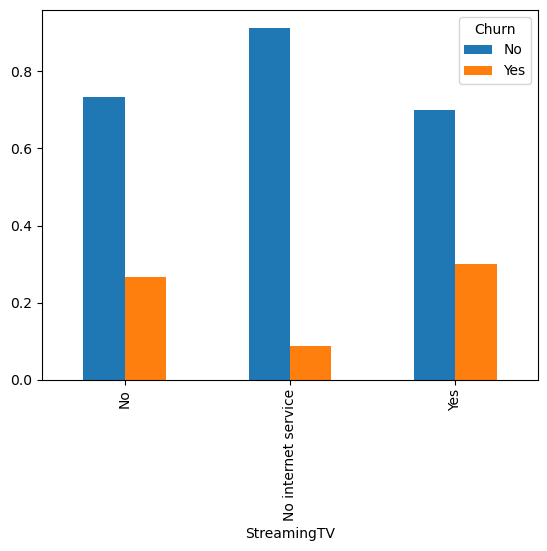

In [266]:
services = pd.crosstab(train_df['StreamingTV'],train_df['Churn'])

services.div(services.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

In [270]:
df2 = train_df[['StreamingTV','TotalCharges','Churn']]

df2.head()

,StreamingTV,TotalCharges,Churn
0,No,29.850000,No
1,No,1889.500000,No
2,No,108.150002,Yes
3,No,1840.750000,No
4,No,151.649994,Yes


In [272]:
train_df[['StreamingTV','TotalCharges','Churn']].groupby('Churn').sum()

,TotalCharges
Churn,
No,9.498170e+06
Yes,2.092874e+06


The Company will loose a total of the above from the people that churned using StreamingTV

In [208]:
# 4) Which Services has the highest charge

train_df.groupby('PhoneService')["TotalCharges"].sum()


PhoneService
No     7.304023e+05
Yes    1.086064e+07
Name: TotalCharges, dtype: float64

In [209]:
train_df.groupby('InternetService')['TotalCharges'].sum()

InternetService
DSL            3.644666e+06
Fiber optic    7.223859e+06
No             7.225198e+05
Name: TotalCharges, dtype: float64

In [210]:
train_df.groupby('OnlineBackup')['TotalCharges'].sum()

OnlineBackup
No                     4.582403e+06
No internet service    2.778745e+05
Yes                    6.730767e+06
Name: TotalCharges, dtype: float64

In [211]:
train_df.groupby('DeviceProtection')['TotalCharges'].sum()

DeviceProtection
No                     4.494183e+06
No internet service    2.778745e+05
Yes                    6.818987e+06
Name: TotalCharges, dtype: float64

In [212]:
train_df.groupby('TechSupport')['TotalCharges'].sum()

TechSupport
No                     5.677652e+06
No internet service    2.778745e+05
Yes                    5.635518e+06
Name: TotalCharges, dtype: float64

In [213]:
train_df.groupby('StreamingTV')['TotalCharges'].sum()

StreamingTV
No                     4.031138e+06
No internet service    2.778745e+05
Yes                    7.282033e+06
Name: TotalCharges, dtype: float64

In [214]:
train_df.groupby('StreamingMovies')['TotalCharges'].sum()

StreamingMovies
No                     3.475793e+06
No internet service    2.778745e+05
Yes                    7.837377e+06
Name: TotalCharges, dtype: float64

In [274]:
train_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000
mean,32.576641,65.090214,2298.442297
std,24.529807,30.068133,2269.501101
min,0.000000,18.400000,18.799999
25%,9.000000,35.775000,415.724997
50%,29.000000,70.550003,1398.599976
75%,56.000000,90.050003,3857.575073
max,72.000000,118.650002,8670.100000


In [215]:
# 4) Which Gender churn the most.

train_df[['gender','Churn']].groupby('Churn').value_counts()

Churn  gender
No     Male      1884
       Female    1823
Yes    Male       675
       Female     661
dtype: int64

### The gender that churn the most is Male gender with a total of 675

<AxesSubplot:title={'center':'Churn Rate'}, xlabel='Churn,gender'>

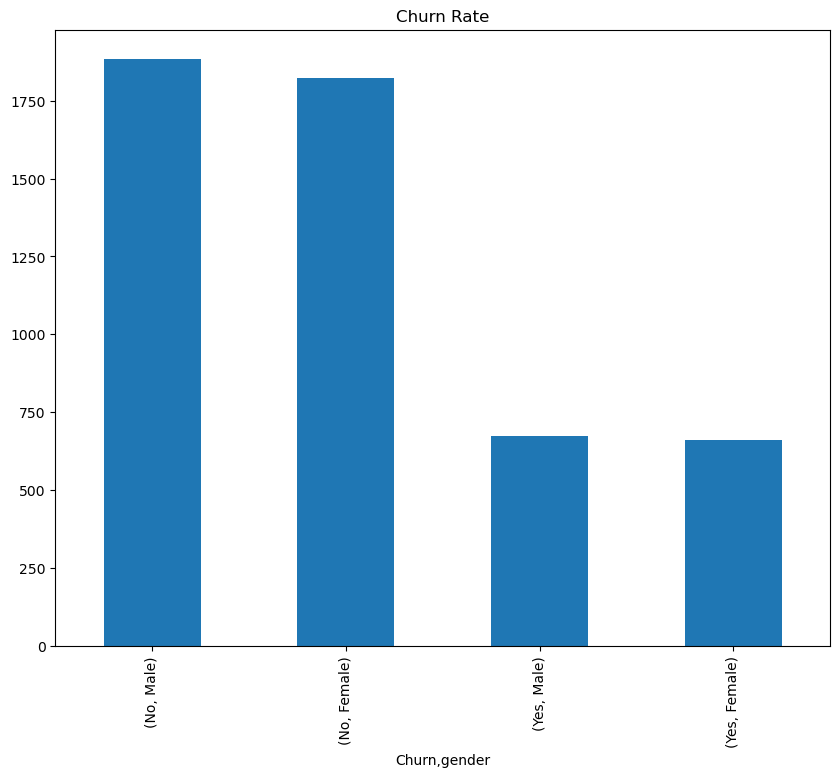

In [216]:
train_df[['gender','Churn']].groupby('Churn').value_counts().plot.bar(figsize = (10,8), title = 'Churn Rate')

# CONCLUSION AND RECOMMENDATIONS

## The followings are the Concluions and recommendations:

1) The company has a churn rate of 26.5%

2) The Company has a higher percentages of junior citizens than the senior Citizen and as such makes more money as the junior citizens are more likely to be using more of the dital services.

3) The gender does not have any effect on the churn rate.

4) The service with the most churn rate is the StreamingTV, followed by the StreamingMovies and the phoneservice.

5) The churn rate can be reduced by reducing the charges for the StreamingTV, StreamingMovies and Phoneservices as well as offering some bonues.